# Data exploration

In [1]:
# reset variables
%reset -f

# import external modules
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
from datetime import datetime
from functions import get_stats_properties

from cognite.client import CogniteClient
client = CogniteClient(api_key=os.environ['COGNITE_API_SECRET'])

# define global root path
ROOT_PATH = os.path.abspath(".").split("src")[0]

# set plot settings
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})

rc('figure', figsize=(12,6))
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)
rc('font', family='serif')

SEED=100
np.random.seed(SEED)

In [60]:
path = ROOT_PATH + "data/"

headers = pd.read_csv(path + "metadata/headers.csv",
                      sep=";", keep_default_na=False, header=None).values[:,0]

target_tags = pd.read_csv(path + "metadata/tags_targets.csv",
                          sep=";", keep_default_na=False, header=None).values[:,0]

selected_tags = pd.read_csv(path + "metadata/feature_selection/features_bor.csv", 
                            sep=",", keep_default_na=False)

dtimestamps = np.load(path + "metadata/dtimestamps.npy")
scaled_data = np.load(path + "scaled/data_scaled_full.npy")
selected_data = np.load(path + "feature_selection/boruta/complete_bor.npy")
selected_train = np.load(path + "feature_selection/boruta/train_bor.npy")
selected_valid = np.load(path + "feature_selection/boruta/valid_bor.npy")
selected_test = np.load(path + "feature_selection/boruta/test_bor.npy")

print(headers.shape)
print(scaled_data.shape)
print(selected_data.shape)

print(selected_train.shape)
print(selected_valid.shape)
print(selected_test.shape)

(117,)
(88685, 117)
(88685, 36)
(53211, 36)
(17737, 36)
(17737, 36)


In [56]:
# make sure that the data is exported correctly
all_tags = np.concatenate((target_tags, selected_tags["Tag"].values))
stats_orig = get_stats_properties(pd.DataFrame(scaled_data, columns=headers))
stats_select = get_stats_properties(pd.DataFrame(selected_data, columns=all_tags))

# check that mean is the same for all selected tags
for i in range(len(selected_tags)):   
    tag = selected_tags.iloc[i]
    mean_orig = stats_orig.loc[tag["Tag"]]["Mean"]
    mean_select = stats_select.loc[tag["Tag"]]["Mean"]
    
    assert mean_orig == mean_select

In [58]:
stats_orig.head()

,Mean,Median,Std,Max,Min,1st Qu.,3rd Qu.,NAs
VAL_23-FT-92537-01:X.Value,-0.116257,-0.154741,1.021175,14.726811,-4.281568,-0.804546,0.520485,0.0
VAL_23-TT-92539:X.Value,0.603135,0.588642,1.213114,6.229767,-5.103244,-0.214788,1.426614,0.0
VAL_23-PT-92539:X.Value,0.003391,0.021609,0.991716,8.605412,-3.817090,-0.720867,0.718394,0.0
VAL_23-FT-92512:X.Value,0.426370,0.579417,1.008859,4.562656,-4.868986,-0.155041,1.126018,0.0
VAL_23-FT-92521:X.Value,0.019508,0.306563,0.974698,5.017198,-4.135083,-0.163974,0.591832,0.0


In [59]:
stats_select.head()

,Mean,Median,Std,Max,Min,1st Qu.,3rd Qu.,NAs
VAL_23-FT-92537-01:X.Value,-0.116257,-0.154741,1.021175,14.726811,-4.281568,-0.804546,0.520485,0.0
VAL_23-TT-92539:X.Value,0.603135,0.588642,1.213114,6.229767,-5.103244,-0.214788,1.426614,0.0
VAL_23-PT-92539:X.Value,0.003391,0.021609,0.991716,8.605412,-3.817090,-0.720867,0.718394,0.0
VAL_23-KA-9101-M01-62B:X.Value,-0.070764,-0.068743,1.006335,11.927243,-5.074922,-0.744877,0.597515,0.0
VAL_23-KA-9101_APE:VALUE,0.005011,0.059262,1.070098,8.874622,-18.705230,-0.584821,0.677753,0.0


## Plots and distributions

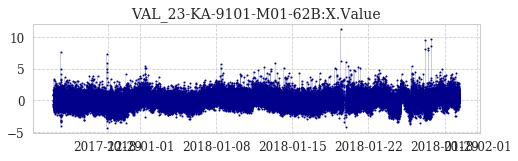

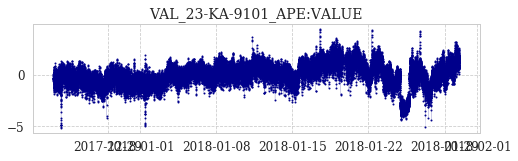

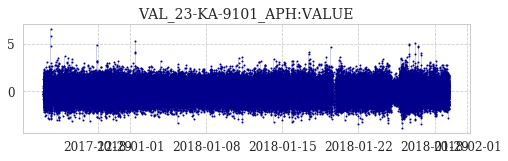

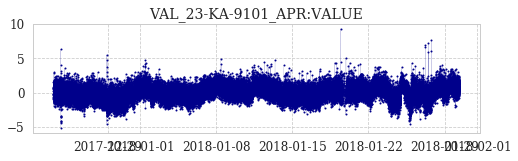

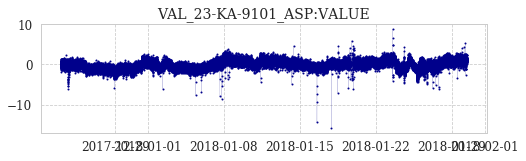

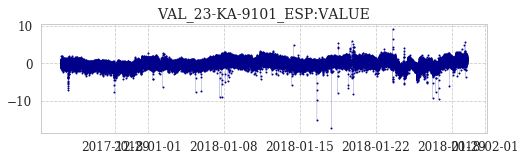

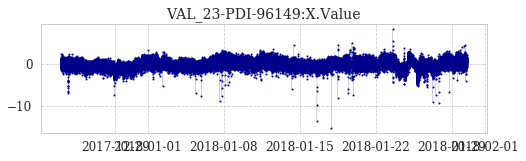

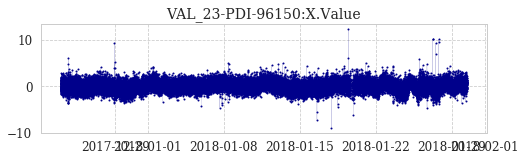

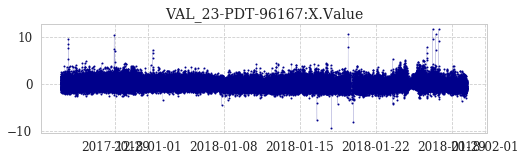

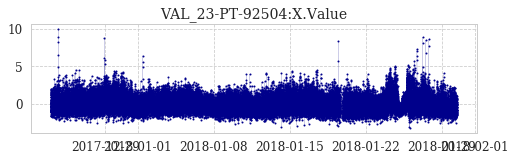

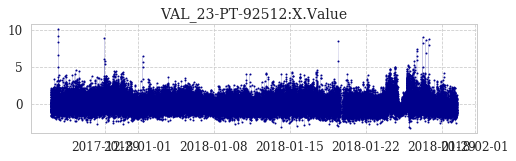

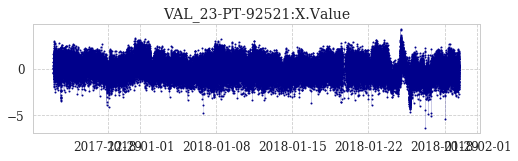

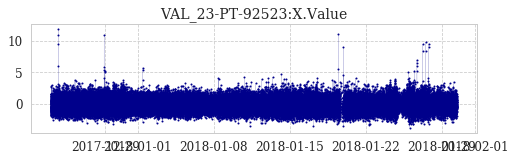

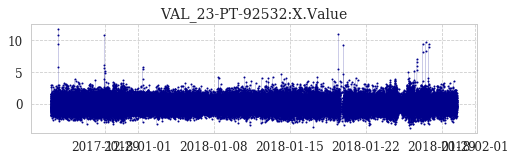

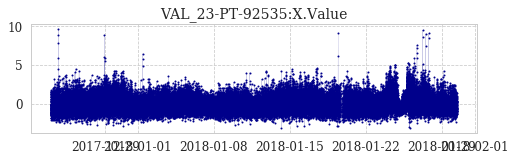

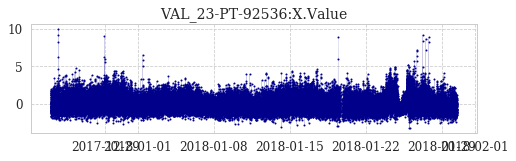

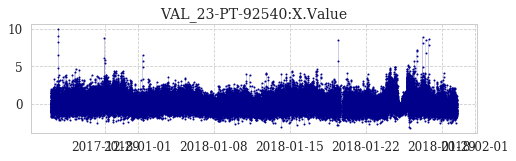

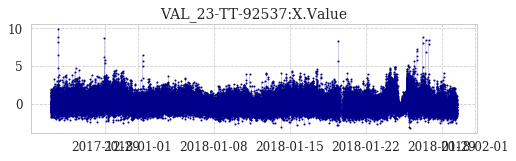

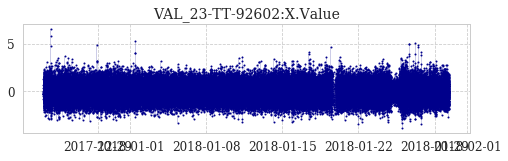

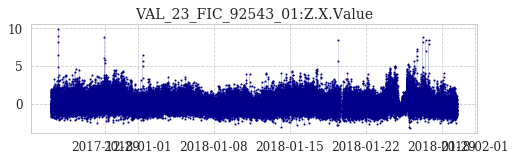

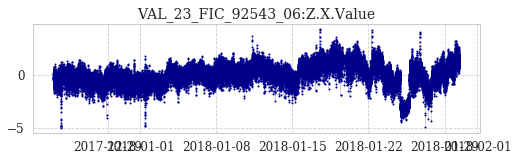

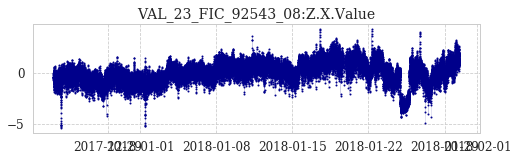

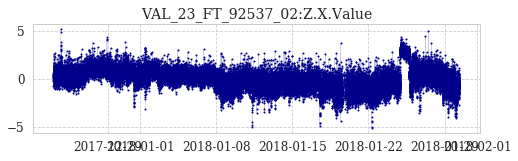

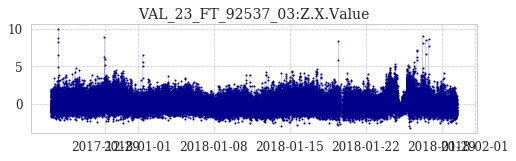

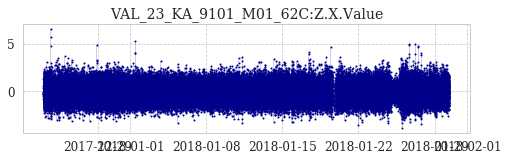

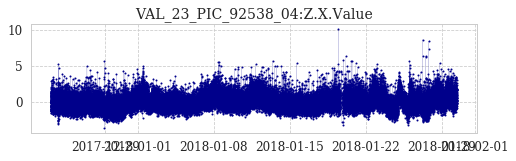

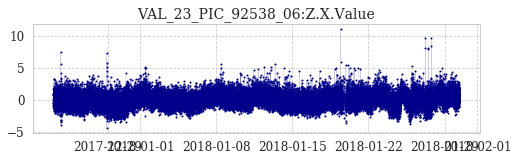

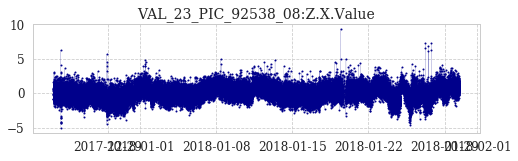

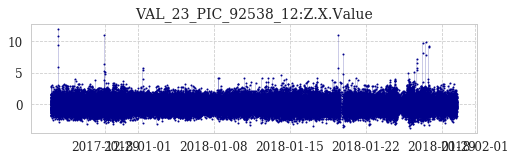

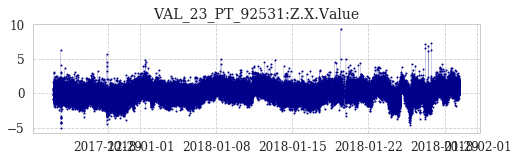

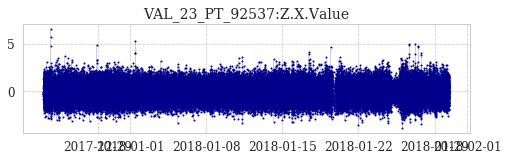

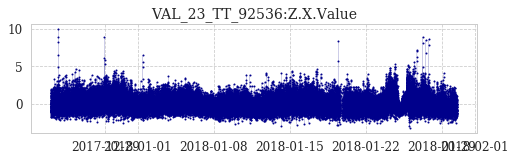

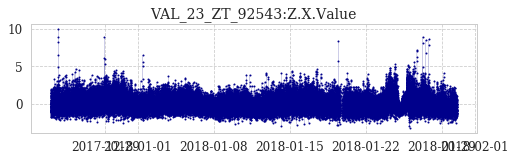

In [74]:
target = 4

for i in range(len(selected_tags)):
    plt.figure(figsize=(8,2))
    plt.title(selected_tags["Tag"][i])
    plt.plot(dtimestamps[:len(selected_train)], selected_train[:, i], 
         marker="o", ms=1, lw = 0.1, c="darkblue", ls="-")
    plt.show()

#### Autocorrelation

array([ 1.02518839,  1.60447187, -0.51118345, ...,  0.57849078,
        1.62459242, -0.29213832])

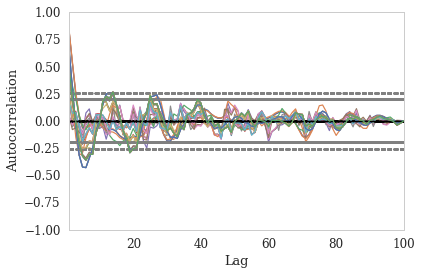

In [91]:
data = selected_train
tags = np.concatenate((target_tags, selected_tags["Tag"].values))

for target in range(len(selected_tags)):
    pd.plotting.autocorrelation_plot(pd.DataFrame(data[:100,target], columns=[tags[target]]))

In [93]:
pd.DataFrame(data).corr()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.000000,-0.171667,0.381845,0.938208,0.073895,-0.089061,-0.058788,0.836478,0.511431,0.397748,...,0.996007,0.936904,0.694643,0.936913,0.379487,0.382512,0.382495,0.373092,-0.146623,0.088561
1,-0.171667,1.000000,-0.081912,-0.041795,0.238814,0.511969,0.275684,-0.044706,-0.341107,-0.222674,...,-0.171413,-0.042628,-0.284374,-0.042647,-0.080614,-0.226655,-0.226659,-0.077832,0.994633,-0.657520
2,0.381845,-0.081912,1.000000,0.556506,-0.021327,-0.022984,0.057503,0.380957,0.791176,0.831282,...,0.379234,0.566116,0.504086,0.566135,0.999801,0.826808,0.826813,0.999520,-0.091416,-0.293539
3,0.938208,-0.041795,0.556506,1.000000,0.266501,0.157410,0.193891,0.807814,0.500076,0.394750,...,0.935844,0.995493,0.613338,0.995471,0.554847,0.378058,0.378039,0.549939,-0.020939,-0.082113
4,0.073895,0.238814,-0.021327,0.266501,1.000000,0.860614,0.852253,-0.078477,-0.418371,-0.457762,...,0.070119,0.265007,-0.224245,0.265043,-0.020751,-0.469568,-0.469559,-0.019408,0.225312,-0.329599
5,-0.089061,0.511969,-0.022984,0.157410,0.860614,1.000000,0.961417,-0.097685,-0.507079,-0.512134,...,-0.093225,0.155648,-0.417221,0.155690,-0.021372,-0.521763,-0.521745,-0.017814,0.510289,-0.370665
6,-0.058788,0.275684,0.057503,0.193891,0.852253,0.961417,1.000000,-0.091514,-0.430536,-0.463126,...,-0.063747,0.192610,-0.385213,0.192655,0.059099,-0.472227,-0.472204,0.062612,0.275809,-0.216267
7,0.836478,-0.044706,0.380957,0.807814,-0.078477,-0.097685,-0.091514,1.000000,0.598968,0.371363,...,0.833542,0.813893,0.550186,0.813907,0.380487,0.359780,0.359769,0.377637,-0.013074,0.048174
8,0.511431,-0.341107,0.791176,0.500076,-0.418371,-0.507079,-0.430536,0.598968,1.000000,0.914600,...,0.510688,0.511473,0.673523,0.511503,0.790773,0.914053,0.914067,0.789279,-0.340024,-0.014056
9,0.397748,-0.222674,0.831282,0.394750,-0.457762,-0.512134,-0.463126,0.371363,0.914600,1.000000,...,0.398127,0.401780,0.678576,0.401803,0.830061,0.998820,0.998828,0.827278,-0.230322,-0.115116
